# Task-04

<i>Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.</i>

# About Dataset

## Description

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

Dataset available here: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

## Importing the necessary libraries

In [13]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [14]:
data = pd.read_csv("twitter_validation.csv")

## Information about the dataframe

In [18]:
data.columns

Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

In [20]:
data.shape

(999, 4)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [30]:
data.describe()

,3364
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


## Checking for null/missing values in the dataset

In [33]:
data.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

TextBlob is a free, open-source library in Python for processing textual data. It is a powerful package that reduces the complexity of the contextual data and derives in-depth information from the text.

In [ ]:
pip install textblob

# Data Processing

In [32]:
# Assign column names assuming the text data is in the last column
# Adjust the column names as needed based on your inspection
data.columns = ['id', 'company', 'sentiment', 'text']

# Function to clean the text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the clean_text function to the text column
data['cleaned_text'] = data['text'].apply(clean_text)

# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the get_sentiment function to the cleaned_text column
data['polarity'] = data['cleaned_text'].apply(get_sentiment)

# Classify sentiments based on polarity
data['sentiment'] = data['polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the first few sentiment scores
print(data[['cleaned_text', 'polarity', 'sentiment']].head())

                                        cleaned_text  polarity sentiment
0  bbc news  amazon boss jeff bezos rejects claim...   0.00000   neutral
1   why do i pay for word when it functions so po...  -0.40000  negative
2  csgo matchmaking is so full of closet hacking ...  -0.35000  negative
3  now the president is slapping americans in the...   0.20000  positive
4  hi  ive had madeleine mccann in my cellar for ...  -0.21875  negative


# Data Insights

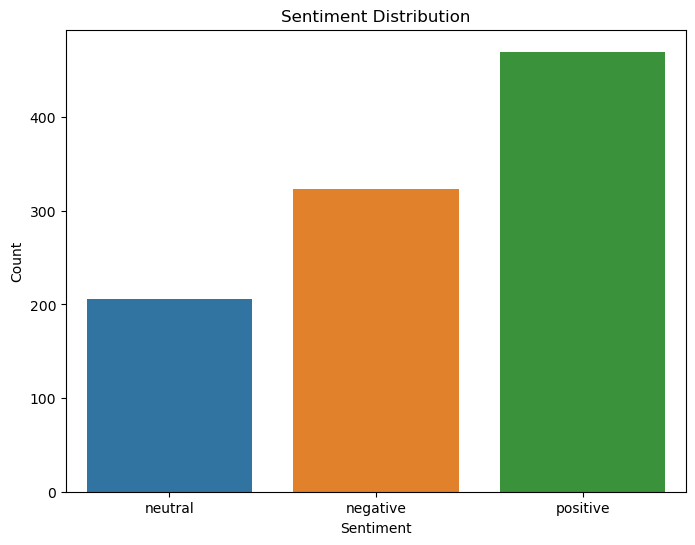

In [33]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

C:\Users\welcome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


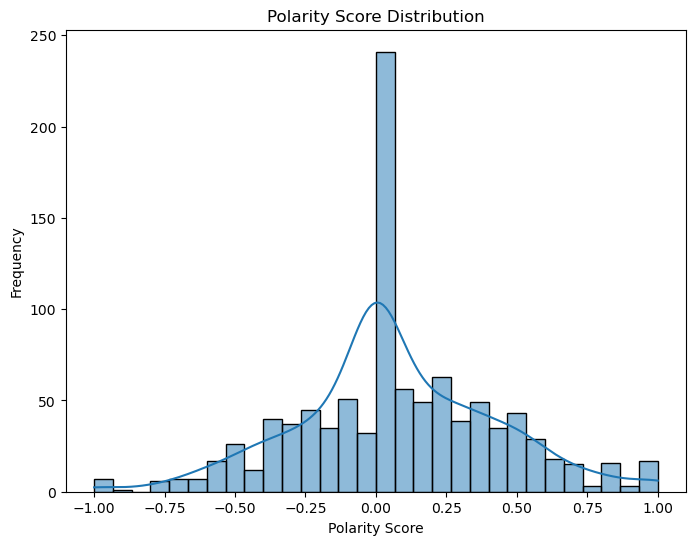

In [34]:
# Plot the polarity score distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['polarity'], bins=30, kde=True)
plt.title('Polarity Score Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()